# Customer Churn Analysis Project

### Importing libraries
### These libraries are essential for handling the dataset, processing it, and creating visual representations to gain insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Preview the Data

In [2]:
df = pd.read_csv("C:/Users/syedf/Downloads/Churn project/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning
### Fixing TotalCharges Column
### Replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking for Missing Data

In [5]:
df.isnull().sum().sum()

0

### Descriptive Statistics
### Descriptive statistics give an initial understanding of the numerical columns, helping to identify patterns like high variability, outliers, or skewness.

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Check for Duplicate Customer IDs

In [7]:
df["customerID"].duplicated().sum()

0

### Data Transformation (Senior Citizen Conversion)

In [8]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)
df.head(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Visualizing Customer Churn
### Churn Count Plot

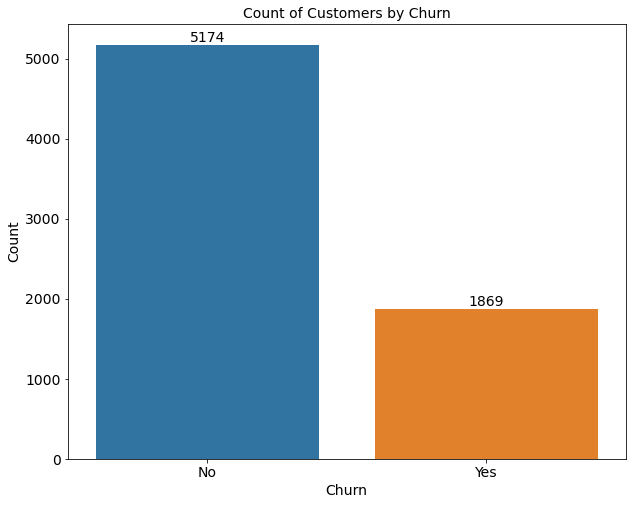

In [9]:
plt.figure(figsize = (10,8))
vf = sns.countplot(x = 'Churn', data = df)

vf.bar_label(vf.containers[0], fontsize = 14)
plt.title("Count of Customers by Churn", fontsize = 14)
plt.xlabel("Churn", fontsize=14)  # Increase x-axis label size
plt.ylabel("Count", fontsize=14)  # Increase y-axis label size
plt.xticks(fontsize=14)  # Increase x-tick labels size
plt.yticks(fontsize=14) # Increase y-tick labels size

plt.show()

### A bar plot is created using Seaborn to show the distribution of the Churn column (whether customers churned or not). Bar labels are added for clarity.

### Churn Pie Chart

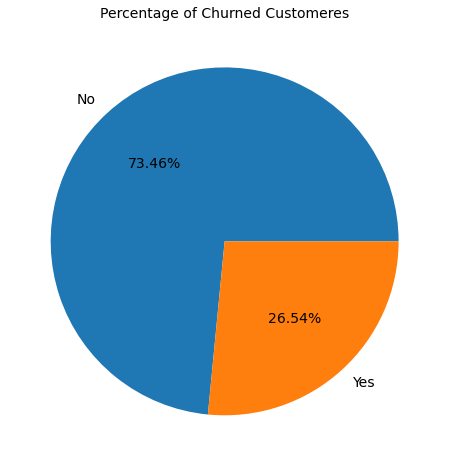

In [10]:
plt.figure(figsize = (10,8))
grby = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(grby['Churn'], labels = grby.index, autopct = "%1.2f%%", textprops={'fontsize': 14})
plt.title("Percentage of Churned Customeres", fontsize = 14)
plt.show()

### A pie chart shows the percentage of customers who churned. From the plot, 26.54% of the customers have churned.

### Churn by Gender

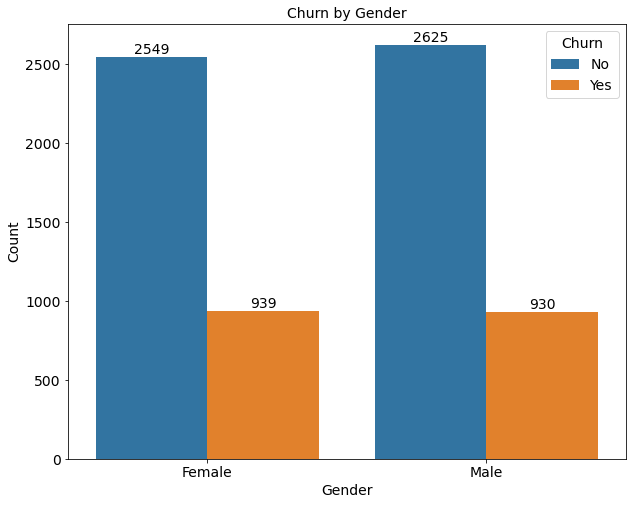

In [11]:
plt.figure(figsize = (10,8))

view = sns.countplot(x = "gender", data = df, hue = "Churn")
view
view.bar_label(view.containers[0], fontsize = 14)
view.bar_label(view.containers[1], fontsize = 14)

plt.legend(title="Churn", fontsize=14, title_fontsize=14) # Increase the legend text size (which represents the hue)

plt.title("Churn by Gender", fontsize=14) 

plt.xlabel("Gender", fontsize=14)  # Increase x-axis label size
plt.ylabel("Count", fontsize=14)  # Increase y-axis label size
plt.xticks(fontsize=14)  # Increase x-tick labels size
plt.yticks(fontsize=14) # Increase y-tick labels size

plt.show()

### A bar plot with a hue argument shows the distribution of Churn across different gender categories (Male/Female).

### Senior Citizen Count Plot

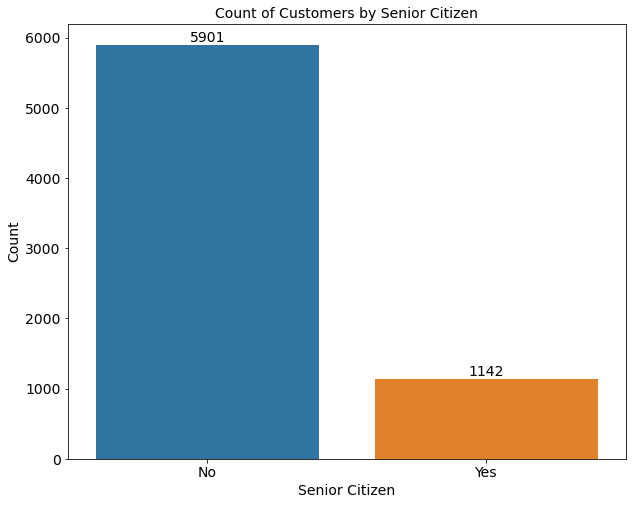

In [12]:
plt.figure(figsize = (10,8))
pt = sns.countplot(x = "SeniorCitizen", data = df)
pt.bar_label(pt.containers[0], fontsize=14)

plt.title("Count of Customers by Senior Citizen", fontsize=14)

plt.xlabel("Senior Citizen", fontsize=14)  # Increase x-axis label size
plt.ylabel("Count", fontsize=14)  # Increase y-axis label size
plt.xticks(fontsize=14)  # Increase x-tick labels size
plt.yticks(fontsize=14) # Increase y-tick labels size

plt.show()

### This plot shows the count of senior citizen customers (Yes/No).

### Churn by Senior Citizen (Stacked Bar Chart)

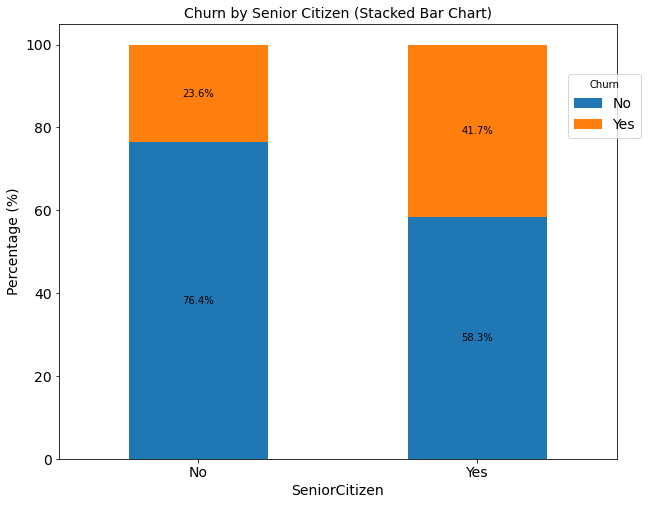

In [13]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'],  fontsize=14)  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)',  fontsize=14)
plt.xlabel('SeniorCitizen',  fontsize=14)
plt.ylabel('Percentage (%)',  fontsize=14)
plt.xticks(rotation=0,  fontsize=14)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9),  fontsize=14)  # Customize legend location

plt.show()

### This stacked bar chart shows churn rates among senior citizens (Yes/No), highlighting that a higher percentage of senior citizens tend to churn.

### Churn by Tenure (Histogram)

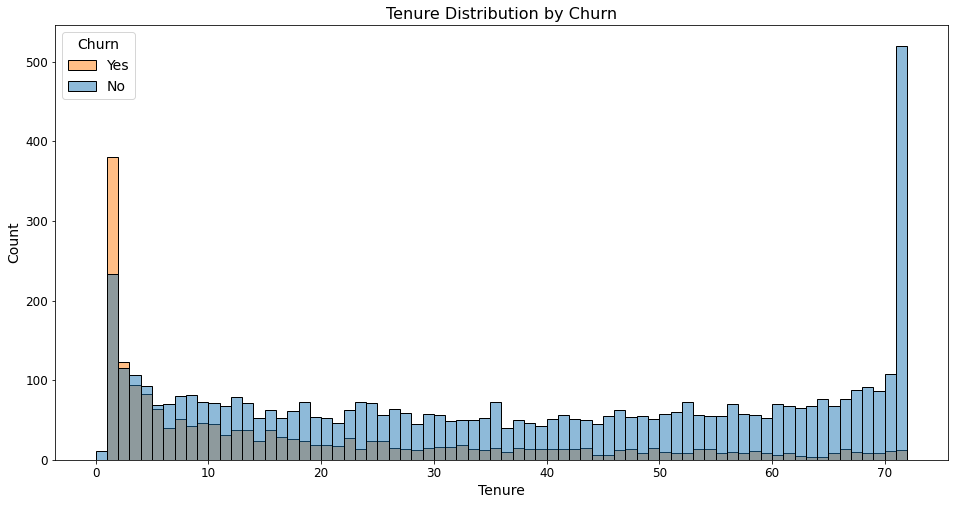

In [14]:
plt.figure(figsize = (16,8))
sns.histplot(x = "tenure", data = df, hue = "Churn", bins = 72)

# Increase text size for labels, ticks, and title
plt.title("Tenure Distribution by Churn", fontsize=16)  # Title text size
plt.xlabel("Tenure", fontsize=14)  # X-axis label text size
plt.ylabel("Count", fontsize=14)  # Y-axis label text size
plt.xticks(fontsize=12)  # X-tick labels text size
plt.yticks(fontsize=12)  # Y-tick labels text size

# # Increase the legend text size
# plt.legend(title="Churn", fontsize=12, title_fontsize=14)

# Manually add labels if the legend doesn't appear automatically
plt.legend(labels=['Yes', 'No'], title="Churn", fontsize=14, title_fontsize=14)

plt.show()

### The plot shows that customers with shorter tenures are more likely to churn, while those with longer tenures tend to stay.

### Churn by Contract Type

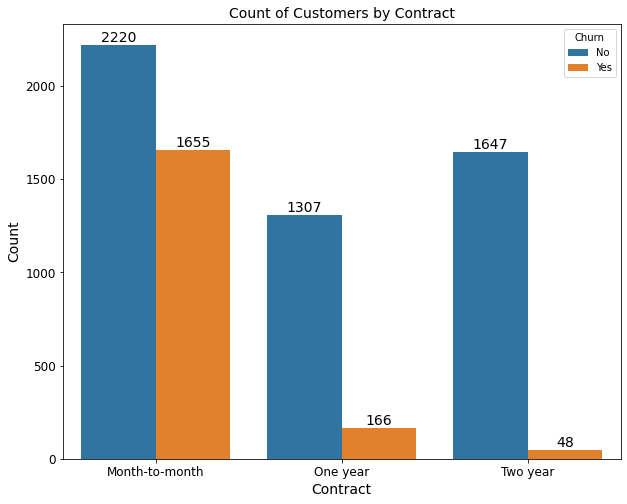

In [15]:
plt.figure(figsize = (10,8))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0], fontsize=14)
ax.bar_label(ax.containers[1], fontsize=14)
plt.title("Count of Customers by Contract", fontsize=14)
plt.xlabel("Contract", fontsize=14)  # X-axis label text size
plt.ylabel("Count", fontsize=14)  # Y-axis label text size
plt.xticks(fontsize=12)  # X-tick labels text size
plt.yticks(fontsize=12)  # Y-tick labels text size

plt.show()

### Customers with month-to-month contracts are more likely to churn, suggesting that longer-term contracts might promote customer retention.

### Checking a list of column names from the DataFrame

In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Services Usage and Churn (Multiple Subplots)

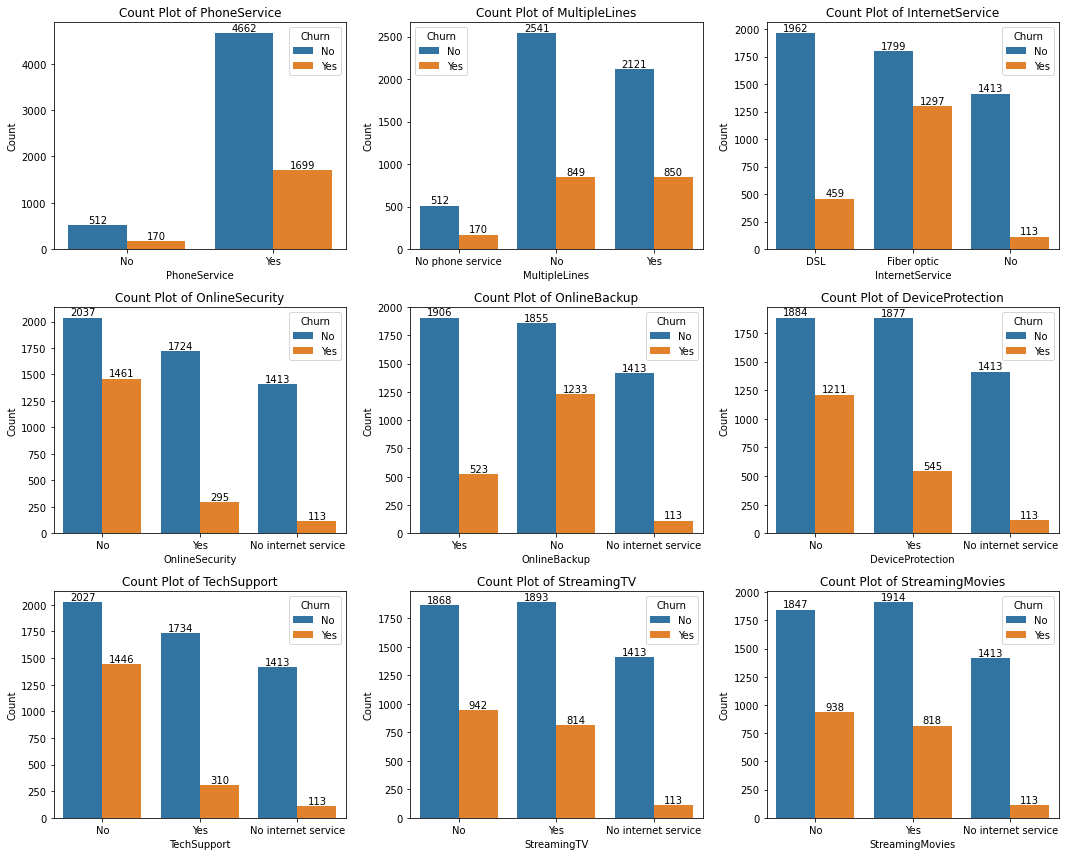

In [17]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    ax = sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

### Churn by Payment Method

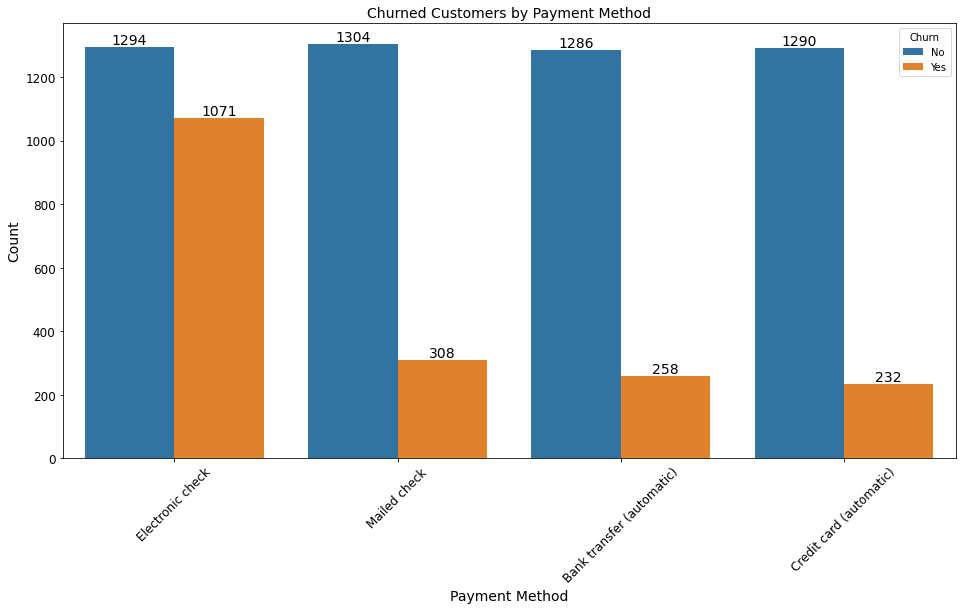

In [18]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0], fontsize=14)
ax.bar_label(ax.containers[1], fontsize=14)
plt.title("Churned Customers by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=14)  # X-axis label text size
plt.ylabel("Count", fontsize=14)  # Y-axis label text size
plt.xticks(fontsize=12)  # X-tick labels text size
plt.yticks(fontsize=12)  # Y-tick labels text size
plt.xticks(rotation = 45)
plt.show()

### The plot reveals that customers using Electronic check are more likely to churn, which might be due to higher fees or less convenience compared to other methods.